#Honey Production Case Study
####C. Griffith - BUSI 650 Summer 2022

#####**Objective** 

> To visualize how honey production has changed over the years (1998-2016) in the United States.




##***Import all the necessary packages.***

In [1]:
# import packages
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline 
sns.set(color_codes=True)
sns.set(style="darkgrid")

##***Read the dataset into pandas dataframes.***

In [2]:
# Authorization of GDrive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Change working directory location to datasets
%cd /content/drive/MyDrive/Data_Science/BUSI_650_Business_Analytics_Decision_Making/Data_Sets

# Load datasets
honey_prod_df = pd.read_csv('honeyproduction1998-2016.csv')

/content/drive/MyDrive/Data_Science/BUSI_650_Business_Analytics_Decision_Making/Data_Sets


##***Preliminary Tasks / EDA***
*Description of Dataset*
* **state**: Various states of U.S.
* **numcol**: Number of honey-producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies that did not survive the entire year
* **yieldpercol**: Honey yield per colony. Unit is pounds
* **totalprod**: Total production (numcol x yieldpercol). Unit is pounds
* **stocks**: Refers to stocks held by producers. Unit is pounds
* **priceperlb**: Refers to average price per pound based on expanded sales. The unit is dollars.
* **prodvalue**: Value of production (totalprod x priceperlb). The unit is dollars.
* **year**: Year of production

*Other useful information* 
* Certain states are excluded every year (ex. CT) to avoid disclosing data for individual operations. 
* Due to rounding, total colonies multiplied by total yield may not equal production.
* Also, the summation of states will not equal the U.S. level value of production

###**Exploration of the data set (e.g. shape, head, tail, sample, info, statistical summary, correlations etc.)**


In [ ]:
# shape of dataset
honey_prod_df.shape

(785, 8)

**Comment**: The dataset has 785 rows (i.e. records) and 8 columns (i.e. features)

---

In [ ]:
# show top 5 rows of the dataset
honey_prod_df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [ ]:
# show last 5 rows of the dataset
honey_prod_df.tail()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
780,Virginia,5000.0,38,190000.0,30000.0,5.85,1112000.0,2016
781,Washington,84000.0,35,2940000.0,412000.0,1.99,5851000.0,2016
782,West Virginia,5000.0,32,160000.0,43000.0,3.92,627000.0,2016
783,Wisconsin,54000.0,62,3348000.0,1205000.0,2.67,8939000.0,2016
784,Wyoming,40000.0,68,2720000.0,190000.0,1.78,4842000.0,2016


In [ ]:
# show datatypes and null values of dataset
honey_prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        785 non-null    object 
 1   numcol       785 non-null    float64
 2   yieldpercol  785 non-null    int64  
 3   totalprod    785 non-null    float64
 4   stocks       785 non-null    float64
 5   priceperlb   785 non-null    float64
 6   prodvalue    785 non-null    float64
 7   year         785 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 49.2+ KB


**Comment**: The dataset primarily has float datatypes for features and contains no null values

---

In [ ]:
# show general stats summary of dataset
honey_prod_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,785,44,Alabama,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numcol,785.0,NaN,NaN,NaN,61686.624204,92748.940458,2000.0,9000.0,26000.0,65000.0,510000.0
yieldpercol,785.0,NaN,NaN,NaN,60.578344,19.427831,19.0,46.0,58.0,72.0,136.0
totalprod,785.0,NaN,NaN,NaN,4140956.687898,6884593.858766,84000.0,470000.0,1500000.0,4096000.0,46410000.0
stocks,785.0,NaN,NaN,NaN,1257629.299363,2211793.817061,8000.0,119000.0,391000.0,1380000.0,13800000.0
priceperlb,785.0,NaN,NaN,NaN,1.695159,0.930623,0.49,1.05,1.48,2.04,7.09
prodvalue,785.0,NaN,NaN,NaN,5489738.853503,9425393.878217,162000.0,901000.0,2112000.0,5559000.0,83859000.0
year,785.0,NaN,NaN,NaN,2006.817834,5.491523,1998.0,2002.0,2007.0,2012.0,2016.0


**Comment**: The dataset has a different range for each feature. There are 44 states represented in this dataset and the state with the most records is Alabama

---

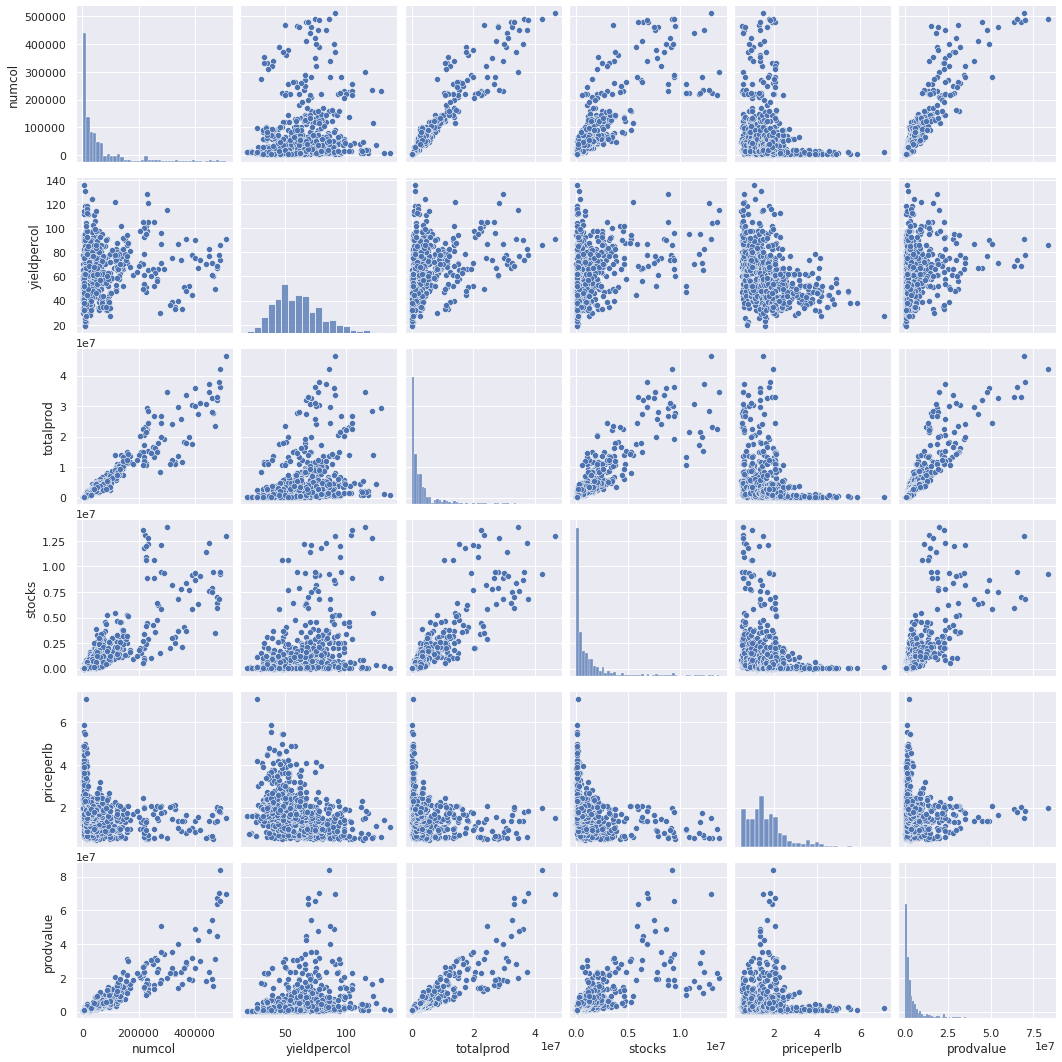

In [ ]:
# create scatter plots between features and histogram for every feature expect for state and year
sns.pairplot(honey_prod_df.drop(columns = ['state', 'year']));

**Comment**: The yeildpercol feature is the only feature that resembles a gaussian distribution. All other features are heavily skewed or have outliers that greatly affect the overall distribution. Notable mentions are the apparent positive correlations between (1) numcol and totalprod, (2) numcol and stocks, (3) numcol and prodvalue, (4) totalprod and stocks, (5) totalprod and prodvalue and (6) stocks and prodvalue. However, it is worth mentioning that these correlations account for all data collected across all years and across all states. More analysis is required to support these claims.

---

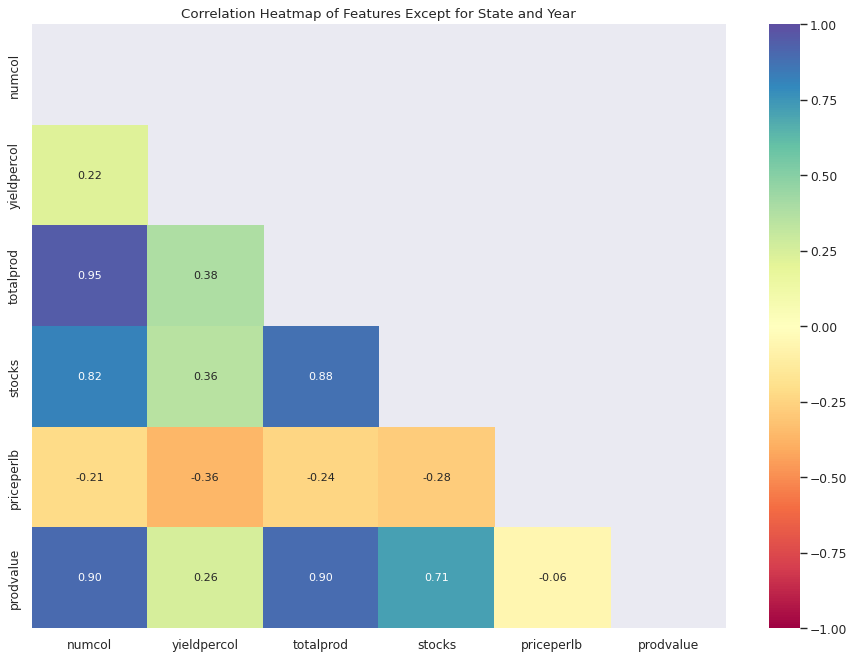

In [ ]:
# create correlation map between features except for State and Year
figure(figsize=(14, 10), dpi=80)
corr = honey_prod_df.drop(columns = ['state', 'year']).corr()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", mask = np.triu(corr)).set(title = "Correlation Heatmap of Features Except for State and Year");

**Comment**: The correlation heatmap provides further support for the previous pairplots and shows strong positive correlations > 0.7 between (1) numcol and totalprod, (2) numcol and stocks, (3) numcol and prodvalue, (4) totalprod and stocks, (5) totalprod and prodvalue and (6) stocks and prodvalue states.  

---

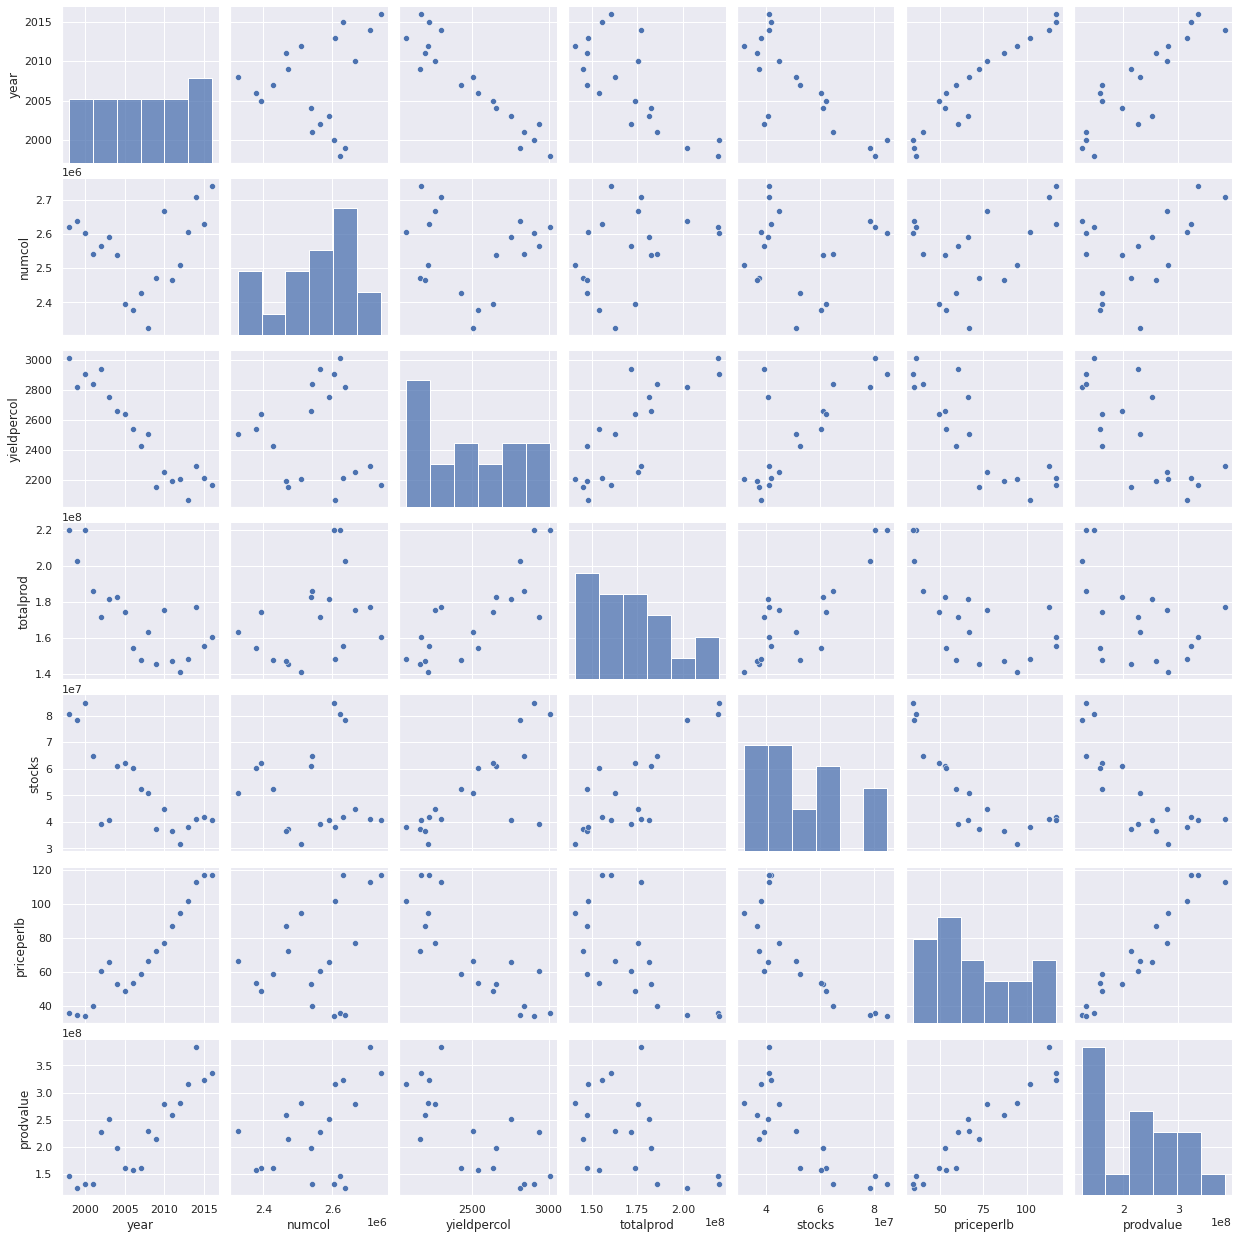

In [ ]:
# Group features and year and take the sum of every feature except for State
by_year_honey_prod_df_no_state = honey_prod_df.groupby(['year']).sum().reset_index()

# create scatter plots between features and histogram for every feature 
sns.pairplot(by_year_honey_prod_df_no_state);

**Comment**: After grouping the dataset by year and taking the summation of each feature across each year, mostly every feature now resembles a guassian distribution. There are many trends (no correlation, postive and negative correlations) between many features now that the data has been aggregated with respect to year. Further analysis is required to investigate these trends. 

---

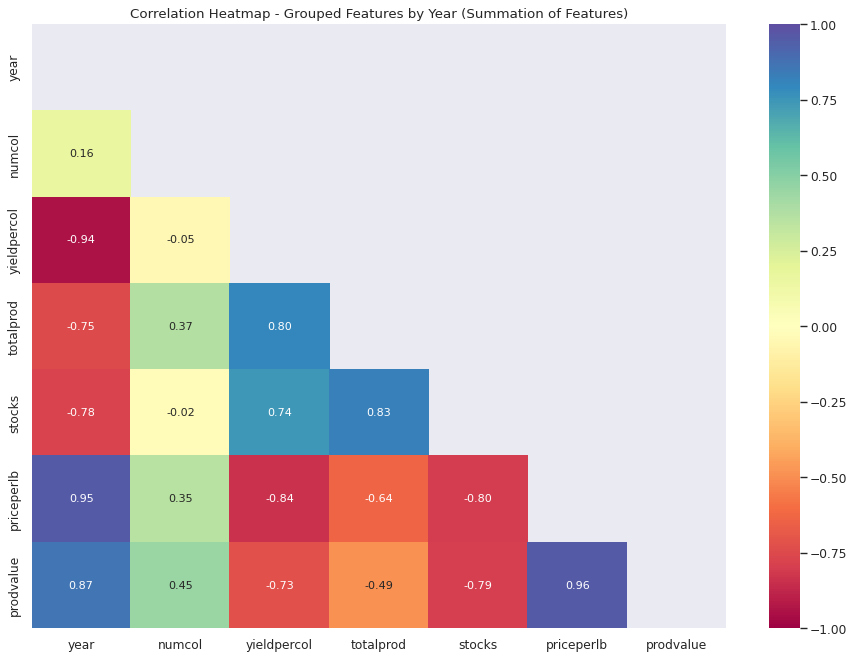

In [ ]:
# create correlation map between features across all years
figure(figsize=(14, 10), dpi=80)
corr = by_year_honey_prod_df_no_state.corr()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", mask = np.triu(corr)).set(title = "Correlation Heatmap - Grouped Features by Year (Summation of Features)");

**Comment**: As mentioned in the previous piarplot, after grouping the dataset by year and taking the summation of each feature across each year, there are many trends (no correlation, postive and negative correlations) between many features. The above correlation heatmap provides further support to this claim.

####***Observation/Answer***

> The dataset appears to be complete with non-null value features that are both measurable and reasonable for this assignment. At first glance, there appears to be correlations between the features in this dataset while also providing evidence of the features' dependance on year. Further investigation is required.

---

###**Check for duplicate rows in the data and drop the duplicate rows, if any.**

In [ ]:
# create a new column to store if the record is duplicated (True/False)
honey_prod_df['entry_duplicated'] = honey_prod_df.duplicated()

# extract all of the records that are duplicated
duplicates_records_df = honey_prod_df[honey_prod_df['entry_duplicated'] == True]

# eliminate the new column created from the original dataframe
honey_prod_df = honey_prod_df.drop(columns=['entry_duplicated'])

# return if the duplicated records dataframe is empty (no duplicates) or not (duplicates)
duplicates_records_df.empty

True

####***Observation/Answer***

> There are no duplicated records in the dataset. Each record is unique.

---

###**Check for missing values in the data. If any column has more than 30% values missing, drop that column from the data set.**

In [ ]:
# returns true if any value in any cell of the dataset is null/missing
if honey_prod_df.isnull().values.any(): 
  print ("Missing data") # True
else:
  print ("No missing data") # False

No missing data


####***Observation/Answer***

> There are no columns that are missing values.

---

###**Check for data types of columns and if needed, change the data type of some columns to the data type appropriate to the data entries.**

In [ ]:
# Check datatypes of features/columns
honey_prod_df.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

####***Observation/Answer***

> All features have appropriate datatypes. The only feature that could possibly be converted is the year feature since it is considered a datetime dtype. However, we do not know the exact date each record was collected (i.e. day, month, year). Therefore, keeping the year as an integer is reasonable enough for this assignment.

---

##***Key Questions with Observations/Answers***

### **1. What is the overall trend of honey production in the US over the years?**


In [6]:
# isolate the totalprod and year features from the honey_prod_df
total_prod_by_year = honey_prod_df[['year', 'totalprod']]

# group the totalprod by year and take the summation of production per year
sum_prod_by_year = total_prod_by_year.groupby(['year']).sum().reset_index()

# show first 5 rows of total_prod_by_year
sum_prod_by_year.head()

,year,totalprod
0,1998,219519000.0
1,1999,202387000.0
2,2000,219558000.0
3,2001,185748000.0
4,2002,171265000.0


**Comment**: Grouped by Year and Summation of honey production is stored in dataframe

---

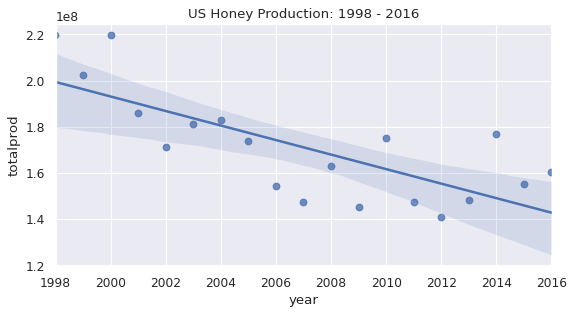

In [7]:
# store min and max years from total_prod_by_year
min = sum_prod_by_year['year'].min()
max = sum_prod_by_year['year'].max()

# create scatter plot and regression of total_prod_by_year
figure(figsize=(8, 4), dpi=80)
sns.regplot(x = "year",
            y = "totalprod", 
            data = sum_prod_by_year).set(title='US Honey Production: 1998 - 2016')

# ensure plot starts and ends at min/max years
plt.xlim(min, max);

**Comment**: Negative correlation between features: *year and total production*

---

####***Observation/Answer***

> From 1998 to 2016, the overall honey production in the United States appears to have decreased linearly. There is a negative correlation between the features year and totalprod in the US (all states combined).

---

###**2. What has been the variation in the number of colonies, and in yield per colony over the years?**

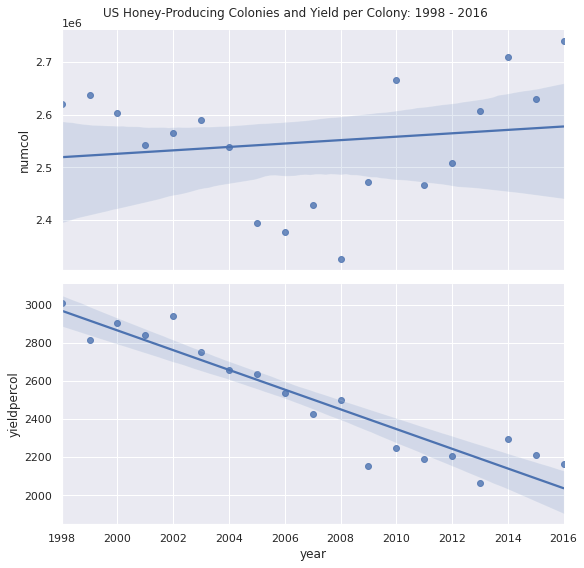

In [8]:
# isolate the numcol, yieldpercol and year features from the honey_prod_df
colonies_by_year = honey_prod_df[['year', 'numcol', 'yieldpercol']]

# group the numcol and yieldpercol by year and take the summation of each feature per year
total_colonies_by_year = colonies_by_year.groupby(['year']).sum().reset_index()

# create scatter plot and regression of numcol and yiedlpercol per year
multi_plot = sns.PairGrid(total_colonies_by_year, y_vars=['numcol', 'yieldpercol'], x_vars=['year'], height=4, aspect=2)
multi_plot.map(sns.regplot)
multi_plot.set(xlim=(min,max))
multi_plot.fig.subplots_adjust(top=0.94)
multi_plot.fig.suptitle('US Honey-Producing Colonies and Yield per Colony: 1998 - 2016', fontsize=12);

**Comment**: (Top Graph) Weak positive correlation between year and number of colonies. (Bottom graph) Strong negative correlation between year and yield per colony. 

---

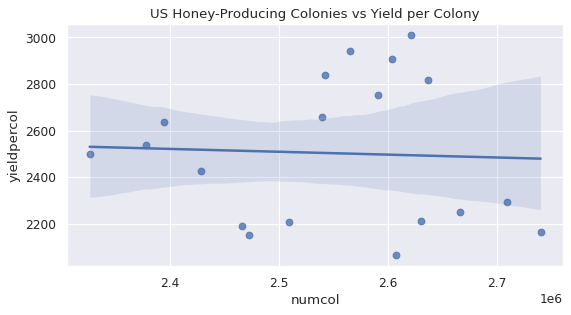

In [9]:
# create scatter plot and regression of numcol vs yiedlpercol
figure(figsize=(8, 4), dpi=80)
sns.regplot(x = "numcol",
            y = 'yieldpercol', 
            data = total_colonies_by_year).set(title='US Honey-Producing Colonies vs Yield per Colony');


**Comment**: No apparent correlation between the two features: *number of colonies and yield per colony*

---

####***Observation/Answer***

> Although the number of colonies and yeild per colony features have an apparent no correlation between them, the time series of each feature has reasonable correlations. The number of colonies has appeared to linearly increased slightly year after year while the overall yeild per colony has linearly decreased significantly year after year.

---

###**3. Look at the production trend across states. Which are the top five honey producing states??**

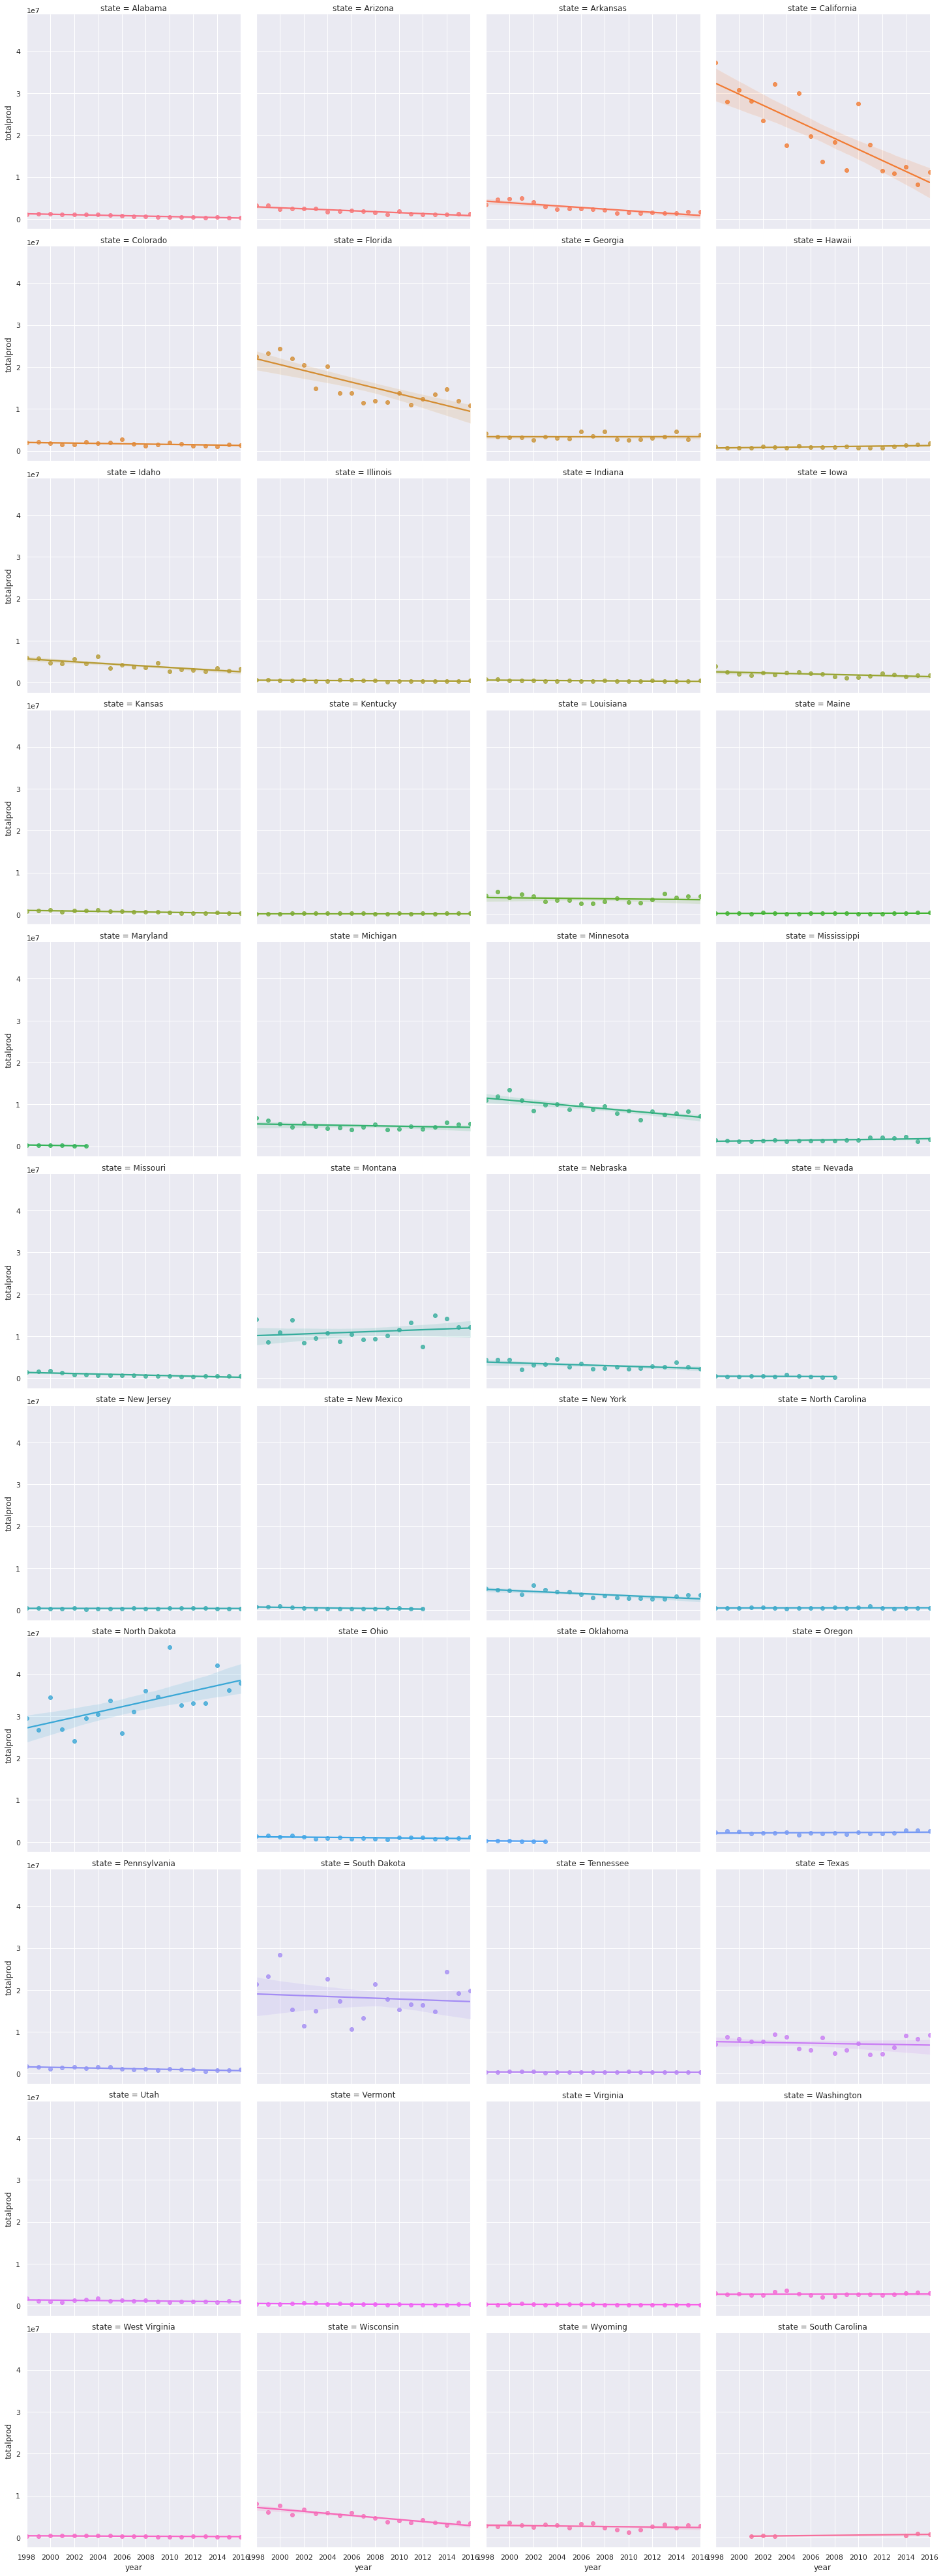

In [10]:
# create scatter plot and regression of totalprod per year per state
sns.lmplot(x="year", y="totalprod", hue="state", col="state",
               data=honey_prod_df, col_wrap=4)

# ensure plot starts and ends at min/max years
plt.xlim(min, max);

**Comment**: Majority of the states appear to have no reasonable change in honey production across the years (i.e. no correlation between production and year). However, there are states that have a sharp decline in production like California and Florida. North Dakota is the only state with a sharp increase  in production.

---

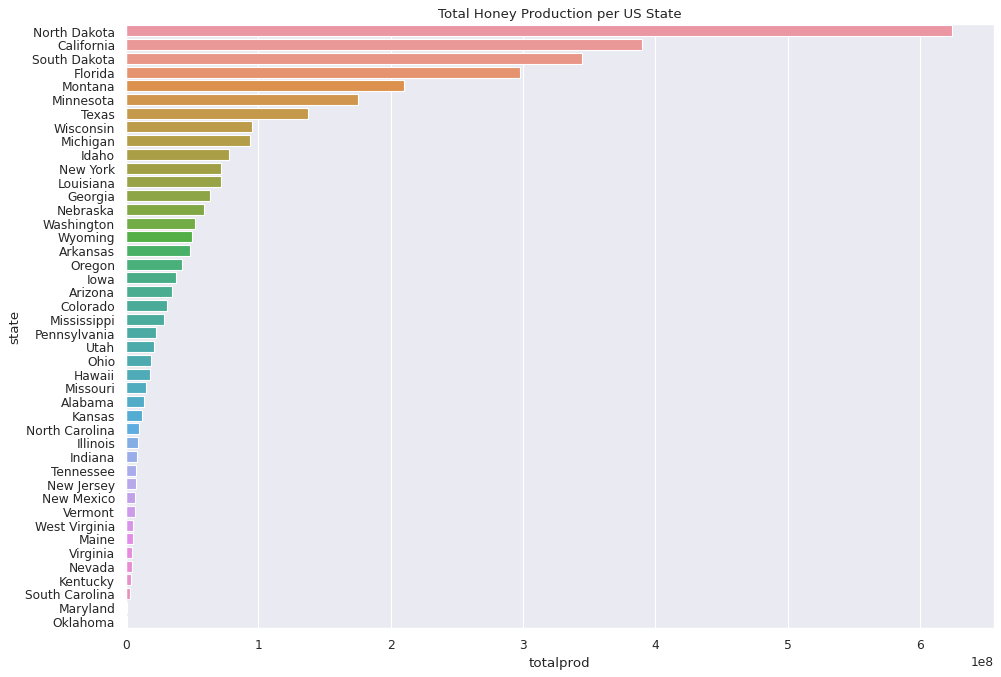

In [11]:
# group the totalprod by state and take the summation of totalprod per state over all years
total_production_by_state = honey_prod_df.groupby(['state'])[['state', 'totalprod']].sum().reset_index()

# sort the totalprod by state from largest to smallest
total_production_by_state = total_production_by_state.sort_values(['totalprod'], ascending = False).reset_index(drop = True)

# plot bar graph comparing states and their corresponding total productions
figure(figsize=(14, 10), dpi=80)
sns.barplot(x="totalprod", y="state", data=total_production_by_state).set(title = 'Total Honey Production per US State');

In [12]:
# export top five states and remaining states
top_five = total_production_by_state.iloc[:5]
remaining = total_production_by_state.iloc[5:]

# show top five states with correspoding honey production
top_five

,state,totalprod
0,North Dakota,624435000.0
1,California,390315000.0
2,South Dakota,344361000.0
3,Florida,297798000.0
4,Montana,210125000.0


**Comment**: The top five states appear to dominate the honey production in United States


---



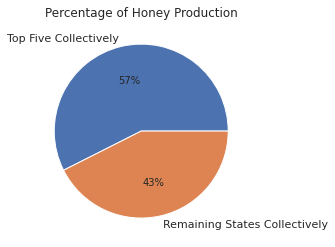

In [13]:
# calculate and store the parts of the pie graph and labels
parts = [top_five['totalprod'].sum(), remaining['totalprod'].sum()]
labels = ['Top Five Collectively', 'Remaining States Collectively']

# plotting data on chart
plt.title("Percentage of Honey Production")
plt.pie(parts, labels=labels, autopct='%.0f%%');

**Comment**: Compared to all states, the top 5 honey producing states (North Dakota, California, South Dakota, Florida and Montana) appear to dominate the honey production in United States by over 50%.

---

####***Observation/Answer***

> North Dakota, California, South Dakota, Florida and Montana are the top five states with the largest honey production across all years collectively. Despite the decline in honey productions in states like California and Florida, the increase in production in North Dakota clearly makes up for this. The top five states dominatin the honey production across all 44 states by over 50% across all year collectively.

---


###**4. What is the yearly trend in number of colonies in each of the five states? Is there a state that stands out?**

In [14]:
# export top five states names
names_of_top_five_states = list(top_five['state'].head())

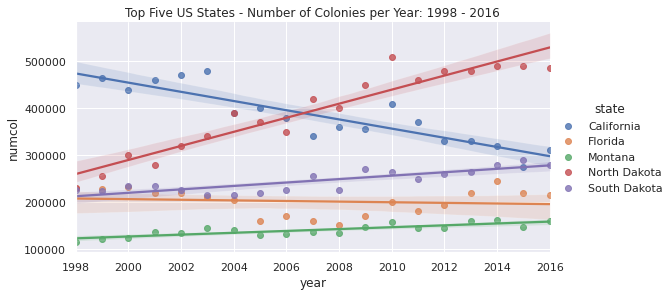

In [17]:
# export a filtered honey dataframe with only the top five states
top_five_states_df = honey_prod_df.loc[honey_prod_df['state'].isin(names_of_top_five_states)].reset_index(drop = True)

# create regression plots of top five states relative the number of colonies per year
sns.lmplot(x="year", y="numcol", hue="state", data=top_five_states_df, height = 4, aspect = 2).set(title = 'Top Five US States - Number of Colonies per Year: 1998 - 2016') 

# ensure plot starts and ends at min/max years
plt.xlim(min, max);

####***Observation/Answer***

> The yearly trend in number of colonies for the top five states appears to either increae or decrease. North Dakota, South Dakota, and Montana have increased their number of colonies  while California and Florida have decreased their number of colonies. North Dakata has the sharpest increase in number of colonies while California has the sharpest decrease in number of colonies.

---

###**5. Examine what effect, if any, the declining production has had on the value of production?**

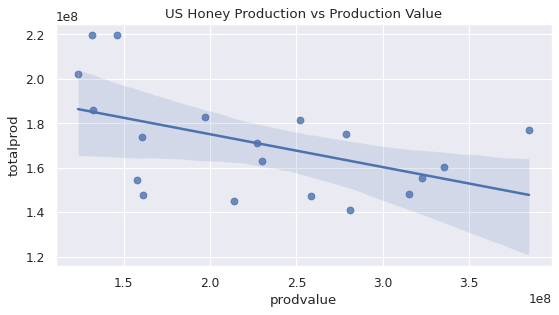

In [ ]:
# isolate the totalprod, prodvalue and year features from the honey_prod_df
prod_and_value_by_year = honey_prod_df[['year', 'totalprod', 'prodvalue']]

# group the totalprod and prodvalue by year and take the summation of each feature per year
total_prod_and_value_by_year = prod_and_value_by_year.groupby(['year']).sum().reset_index()

# create scatter plot and regression of totalprod vs prodvalue
figure(figsize=(8, 4), dpi=80)
sns.regplot(x = 'prodvalue',
            y = 'totalprod', 
            data = total_prod_and_value_by_year).set(title='US Honey Production vs Production Value');

####***Observation/Answer***

> There is a negaitve correlation between the two features: *totalprod and prodvalue*. As honey production declines year after year, the production value of honey increases. There is enough evidence to suggest this correlation may be fueled by supply and demand.

---

###**6. Are there any patterns that can be observed between total honey production and value of production every year? How has value of production, which in some sense could be tied to demand, changed every year?**

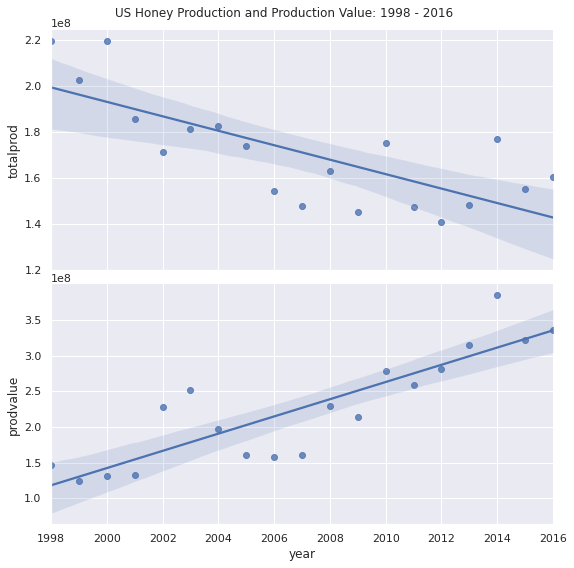

In [ ]:
# create scatter plot and regression of totalprod and prodvalue per year
multi_plot = sns.PairGrid(total_prod_and_value_by_year, y_vars=['totalprod', 'prodvalue'], x_vars=['year'], height=4, aspect=2)
multi_plot.map(sns.regplot)
multi_plot.set(xlim=(min,max))
multi_plot.fig.subplots_adjust(top=0.94)
multi_plot.fig.suptitle('US Honey Production and Production Value: 1998 - 2016', fontsize=12);

####***Observation/Answer***

> Similar to Question 5, the trends between the two features *totalprod and prodvalue* illustrate a negative correlation. More apparently, year after year, total production of honey has decreased while the production value has increased. As insinuated in the question, it is reasonable to assume these trends are inline with supply and demand

---

###**7. How does average price per pound of honey vary across states? Which state has the most expensive honey?**

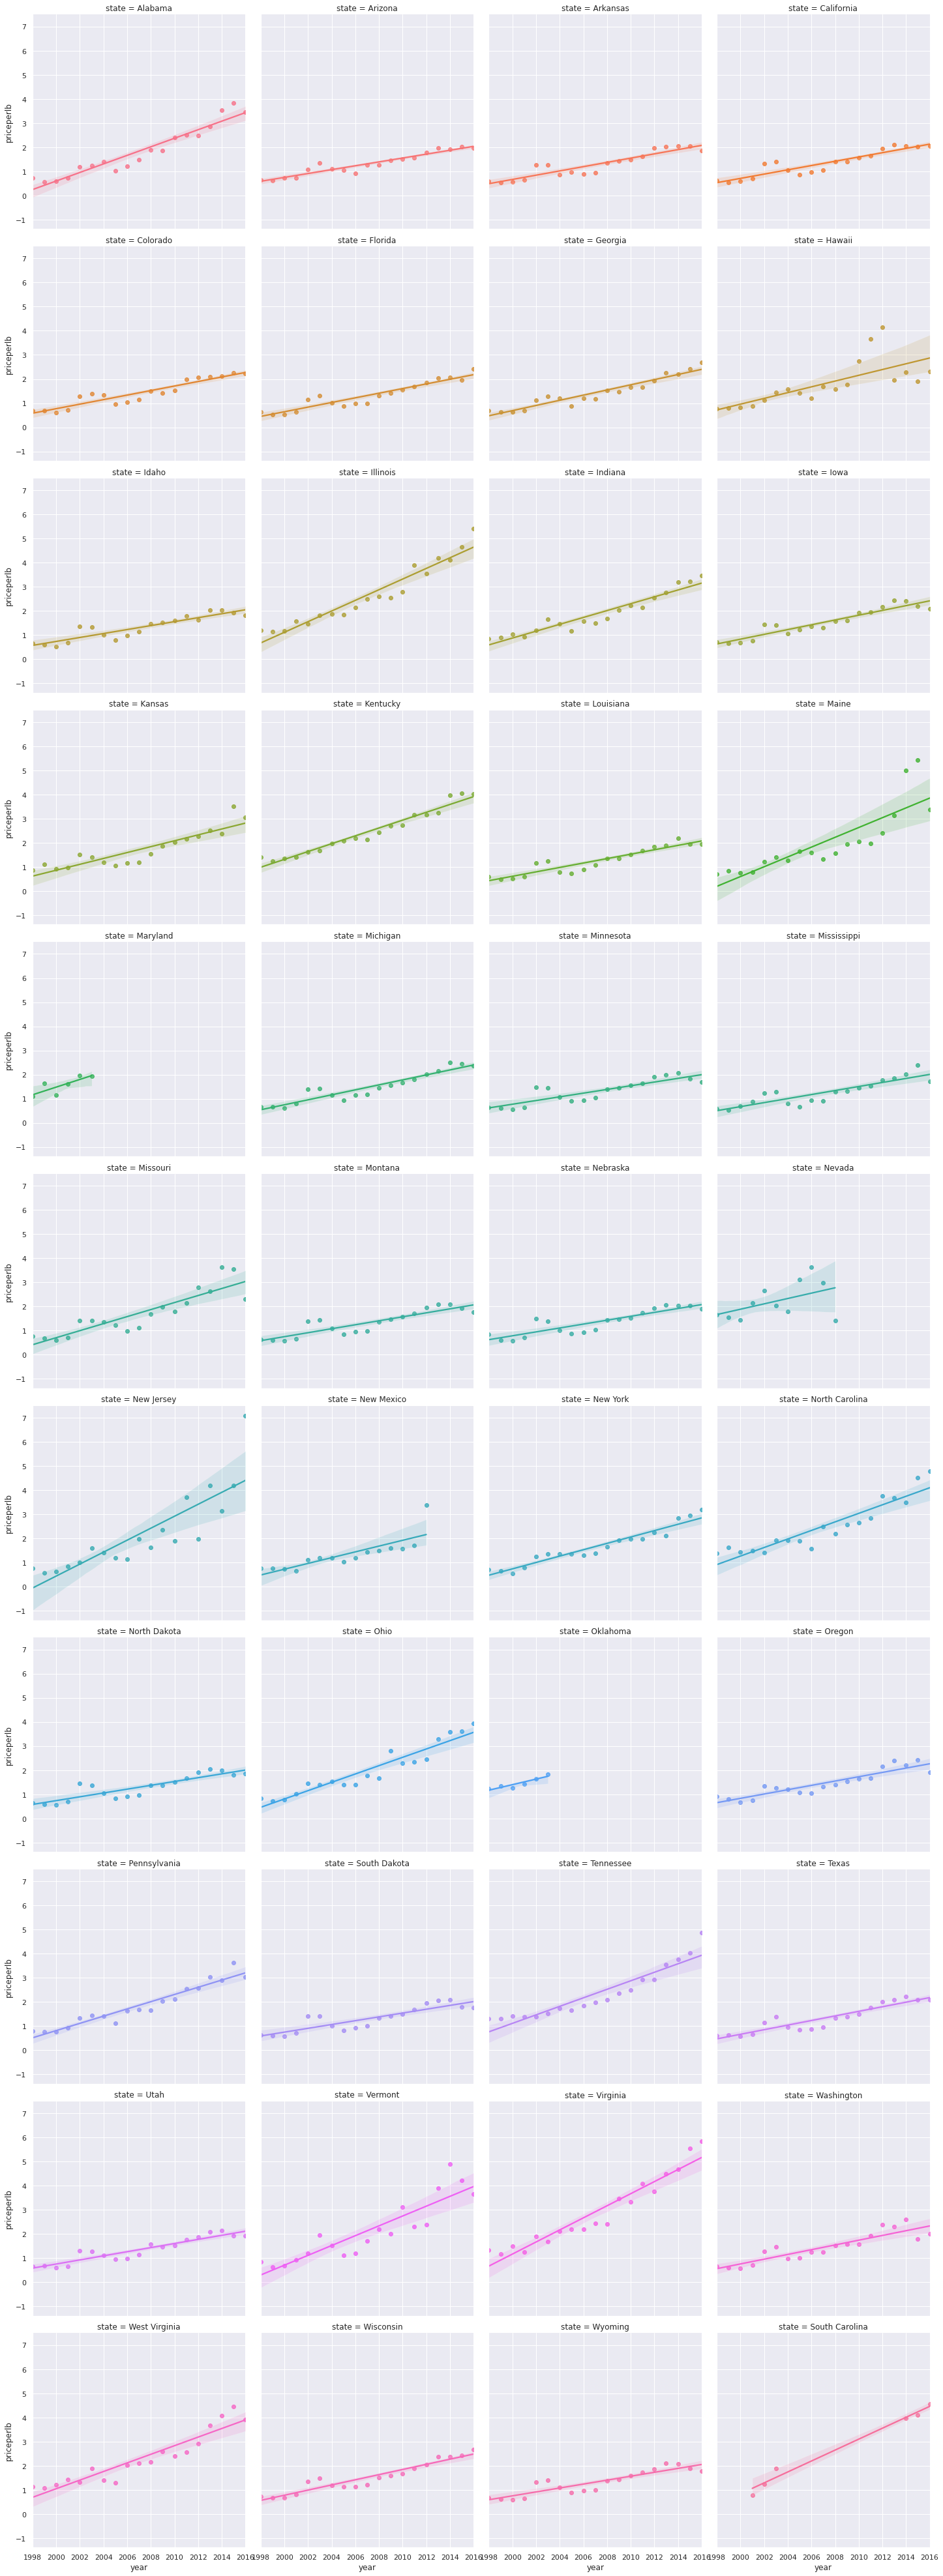

In [ ]:
# create scatter plot and regression of priceperlb per year per state
sns.lmplot(x="year", y="priceperlb", hue="state", col="state",
               data=honey_prod_df, col_wrap=4)

# ensure plot starts and ends at min/max years
plt.xlim(min, max);

**Comment**: It appears that all states have increaed their average price per pound of honey year after year. Virginia and Illinois have the sharpest increase in average price per pound year after year. 


---



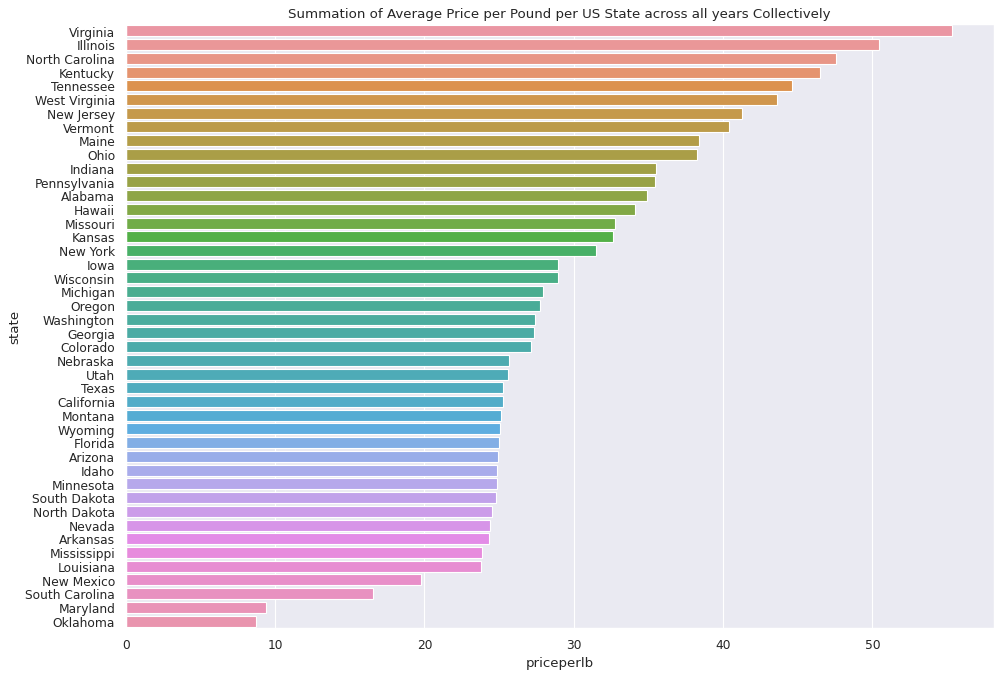

In [ ]:
# group the priceperlb by state and take the summation of priceperlb per state over all years
price_per_pound_by_state = honey_prod_df.groupby(['state'])[['state', 'priceperlb']].sum().reset_index()

# sort the priceperlb by state from largest to smallest
price_per_pound_by_state = price_per_pound_by_state.sort_values(['priceperlb'], ascending = False).reset_index(drop = True)

# plot bar graph comparing states and their corresponding priceperlb
figure(figsize=(14, 10), dpi=80)
sns.barplot(x="priceperlb", y="state", data=price_per_pound_by_state).set(title = 'Summation of Average Price per Pound per US State across all years Collectively');

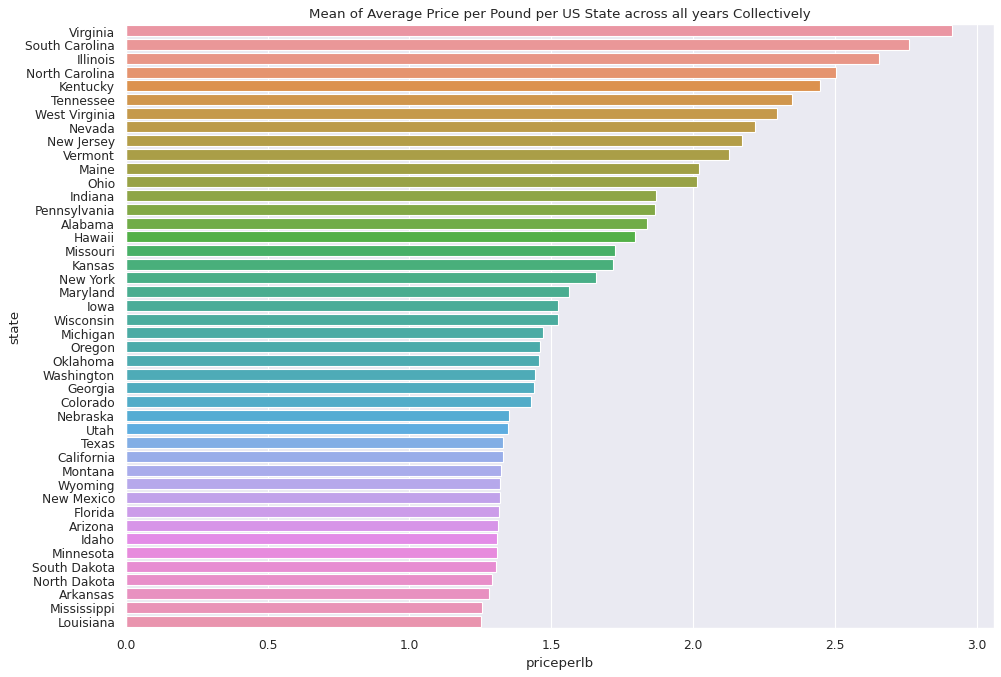

In [ ]:
# group the priceperlb by state and take the mean of priceperlb per state over all years
price_per_pound_by_state = honey_prod_df.groupby(['state'])[['state', 'priceperlb']].mean().reset_index()

# sort the priceperlb by state from largest to smallest
price_per_pound_by_state = price_per_pound_by_state.sort_values(['priceperlb'], ascending = False).reset_index(drop = True)

# plot bar graph comparing states and their corresponding priceperlb
figure(figsize=(14, 10), dpi=80)
sns.barplot(x="priceperlb", y="state", data=price_per_pound_by_state).set(title = 'Mean of Average Price per Pound per US State across all years Collectively');

####***Observation/Answer***

> All states have increased their average price per pound of honey year after year. Based on the bar graphs, Virginia has both the highest average price per pound of honey across all years collectively and the highest summation of average price per pound of honey across all years collectively.

---